In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.data import AUTOTUNE

print("hellow word")

In [1]:
from collections import Counter
import os
import math
import pathlib
from pathlib import Path
from PIL import Image

# path of dataset contain 6 classes for test and train
train_dir = Path(r"C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian")
test_dir = Path(r"C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\test")

allowed_ext = [".jpg", ".jpeg", ".png"]

""" def scan_dir(root: Path):
    classes = [p for p in sorted(root.iterdir()) if p.is_dir() ]
    print(f"\n== {root} ==")
    print(f"Classes found: {len(classes)} -> {[c.name for c in classes]}")

    total = 0
    first_size = None
"""

# dit store result per class
class_image_sizes = {}

# Loop through each subfolder (class) inside train_dir
for class_folder in train_dir.iterdir():
    if class_folder.is_dir():
        size_counter = Counter()

        # loop through all images in class
        for img_file in class_folder.glob("*"):
            if img_file.suffix.lower() in allowed_ext:
                try:
                    with Image.open(img_file) as img:
                        size_counter[img.size] += 1  # img.size = (width, height)
                except Exception as e:
                    print(f"can not open {img_file}: {e}")

        # Save results for this class
        class_image_sizes[class_folder.name] = size_counter

# display results
for class_name, sizes in class_image_sizes.items():
    print(f"\nClass: {class_name}")
    for size, count in sizes.items():
        print(f"  {size[0]}x{size[1]} pixels → {count} images")



Class: buildings
  150x150 pixels → 144 images

Class: forest
  150x113 pixels → 1 images
  150x150 pixels → 143 images

Class: glacier
  150x150 pixels → 143 images
  150x110 pixels → 1 images

Class: mountain
  150x150 pixels → 144 images

Class: sea
  150x150 pixels → 142 images
  150x113 pixels → 1 images
  150x140 pixels → 1 images

Class: street
  150x150 pixels → 144 images


In [2]:
from pathlib import Path
from PIL import Image

train_dir = Path(r"C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian")

TARGET_SIZE = (150, 150)
allowed_ext = {".jpg", ".jpeg", ".png"}
# counter to remove non 150*150 px images
removed_cnt = 0
#  traverse through clases
for class_folder in train_dir.iterdir():
    if class_folder.is_dir():
        for img_file in class_folder.glob("*"):
            if img_file.suffix.lower() in allowed_ext:
                try:
                    # open image and check size then close
                    with Image.open(img_file) as img:
                        # store size before slosing
                        img_size = img.size

                    # if size is not 150 sq then delete
                    if img.size != TARGET_SIZE:
                        print(f"removig {img_file} (size={img.size})")
                        img_file.unlink() # delet that file
                        removed_cnt += 1

                except Exception as expt:
                    print(f"can not open or proces {img_file}: {expt}")

print("reslt")
print(f"\ncleaning done. removed {removed_cnt} images that are not {TARGET_SIZE[0]}x{TARGET_SIZE[1]} pixels.")

removig C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian\forest\1004.jpg (size=(150, 113))
removig C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian\glacier\1010.jpg (size=(150, 110))
removig C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian\sea\341.jpg (size=(150, 113))
removig C:\Users\soban\PycharmProjects\dl_imageclassification\DATASETS\Trian\sea\357.jpg (size=(150, 140))
reslt

cleaning done. removed 4 images that are not 150x150 pixels.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mplot

img_size = (150, 150)
b_size = 32
seed = 1337
AUTOTUNE = tf.data.AUTOTUNE

# load datasets
train_all = keras.utils.image_dataset_from_directory(train_dir, image_size=img_size, batch_size=b_size, label_mode="categorical", shuffle=True, seed=seed)

class_names = train_all.class_names
num_classes = len(class_names)
print(num_classes)
print("all classes::: ", class_names)


Found 860 files belonging to 6 classes.
6
all classes:::  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


1. Create a CNN model with appropriate conv-pooling to produce 32-64-128-256-512-1024 outputs at respective layers with kernal_size =3 and pool_size=2,
followed by flatten and output layers. At the output layer, use appropriate activation function keeping in view number of class labels (10 Marks)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

print("creating input layer")
inputs = keras.Input(shape=(150,150,3))

x = layers.Rescaling(1/255.0)(inputs)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same",  activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

"""
x = layers.Conv2D(filters=1024, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

firstly i used with  by default padding and i saw there is problem sir
after applying a 3×3 conv to a 2×2 feature mapi am geting negative spatial dimensions, which Keras rounds to 0 and also flatten is 0 at this block.
"""
x = layers.Conv2D(filters=1024, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)

outputs = layers.Dense(6, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


creating input layer


2. Compile the model with appropriate loss and optimizer. The performance metric should be accuracy (10 Marks)

In [5]:
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,312,774 (24.08 MB)

 Trainable params: 6,312,774 (24.08 MB)

 Non-trainable params: 0 (0.00 B)

3 Read the dataset (train, test folders from drive) using image_dataset_from_directory utility of Keras. Remember, while reading folders, set label_mode = 'categorical' as this is a multiclass
 classification task, NOT a binary classification as we did in the class (10 Marks)

In [20]:
# making the split 100 train and rem: validatipn

# train_unb = train_all.unbatch().shuffle(10_000, seed=seed, reshiffle_iteration=False)
#
# train_ds  = train_unb.take(100).batch(b_size).prefetch(AUTOTUNE)
# val_ds    = train_unb.skip(100).take(40).batch(b_size).prefetch(AUTOTUNE)
#
# # load test folder and take exactly 100
# test_all = keras.utils.image_dataset_from_directory(
#     test_dir,
#     image_size=img_size,
#     batch_size= b_size,
#     label_mode="categorical",
#     shuffle=False
# )
# test_ds = test_all.unbatch().take(100).batch(b_size).prefetch(AUTOTUNE)
# # batch  cardinality
# print("train batches:", tf.data.experimental.cardinality(train_ds).numpy())
# print("val batches:  ", tf.data.experimental.cardinality(val_ds).numpy())
# print("test batches: ", tf.data.experimental.cardinality(test_ds).numpy())

print("=====================================")

# makeing split from the training folder
#    100 for train 40 for validation (reproducible split)
train_unb = train_all.unbatch().shuffle(
    buffer_size=10_000,
    seed=seed,
    reshuffle_each_iteration=False
)

train_ds = (train_unb
            .take(100)
            .batch(b_size)
            .cache()
            .prefetch(AUTOTUNE))

val_ds = (train_unb
          .skip(100)
          .take(40)
          .batch(b_size)
          .cache()
          .prefetch(AUTOTUNE))

# reading test folder and take 100 image
test_all = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=b_size,
    label_mode="categorical",
    shuffle=False
)

# shuffle after unbatching then take 100 images (same SEED each run)
test_ds = (test_all.unbatch().shuffle(10_000, seed=seed, reshuffle_each_iteration=False).take(100).batch(b_size).cache().prefetch(AUTOTUNE))


# quick sanity checks but it si optiona;
def count_items(ds): return sum(1 for _ in ds.unbatch())
print("train items:", count_items(train_ds))
print("val items:  ", count_items(val_ds))
print("test items: ", count_items(test_ds))


Found 600 files belonging to 6 classes.
train items: 100
val items:   40
test items:  100


task 4 : compile and train in 20 epoches
One-hot labels -> categorical_crossentropy.
metric is Accuracy

In [7]:
from matplotlib import pyplot as plt

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

epoch = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch,
    verbose=1
 )

print(f"final trainning accuracy is: {history.history['accuracy'][-1]:.4f}")
print(f"final  validation  accuracy is: {history.history['val_accuracy'][-1]:.4f}")

"""
1. got .repeat warning
2. removed the warning issued by kera
3. re-trained model with repeat epoch using train_num and batch formula but validation accuracy compromised
4.
 """

Epoch 1/20
      4/Unknown 3s 194ms/step - accuracy: 0.0745 - loss: 1.7930

C:\Users\soban\PycharmProjects\dl_imageclassification\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.1000 - loss: 1.7937 - val_accuracy: 0.2000 - val_loss: 1.7746
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.2300 - loss: 1.7493 - val_accuracy: 0.2000 - val_loss: 1.7762
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.3200 - loss: 1.7391 - val_accuracy: 0.3250 - val_loss: 1.7719
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.3900 - loss: 1.7202 - val_accuracy: 0.3500 - val_loss: 1.7512
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.4000 - loss: 1.6791 - val_accuracy: 0.3750 - val_loss: 1.7013
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.4000 - loss: 1.6034 - val_accuracy: 0.3750 - val_loss: 1.6120
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.4700 - loss: 1.4805 - val_accuracy: 0.3750 - val_loss: 1.4866
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.4800 - loss: 1.3292 - val_accuracy: 0.4250 - val_loss: 1.3694
Epo

'\n1. got .repeat warning\n2. removed the warning issued by kera\n3. re-trained model with repeat epoch using train_num and batch formula but validation accuracy compromised\n4.\n '

5 Plot the train and validation accuracies, does the model overfit? No, there is no an clear elbow in the graph but from the plot it shows there may be a mild overfitting but it is okay


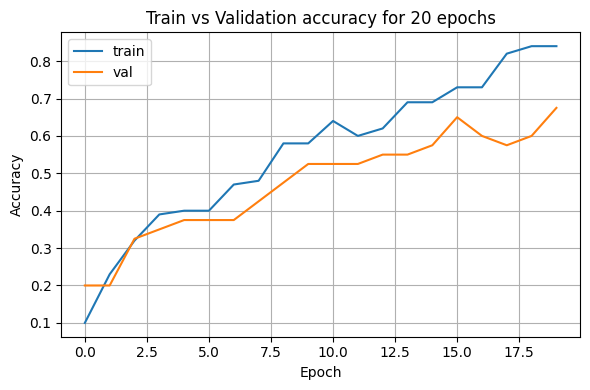

In [9]:
plt.figure(figsize=(6,4))

plt.plot(history.history["accuracy"], label="train")

plt.plot(history.history["val_accuracy"], label="val")

plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Train vs Validation accuracy for 20 epochs")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

6 testing the model on test dataset on 100 images, Test the model performance on test datase

In [14]:
# evaluate on test set and printing accuracy and loss
# model.evaluate() returns [loss, accuracy] because we compiled with metrics=['accuracy'].
test_loss, test_acc = model.evaluate(
    test_ds,
    verbose=0
)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Test loss: 1.2831
Test accuracy: 0.5000


7 Next, using keras.Sequential, create an augmentation layer with randomflip = vertical, randomrotation = 0.3 and randomzoom = 0.3 . Add it at appropriate layer in the above CNN model
 along with a dropout layer of 0.5. Repeat steps 4, 5 and 6 (20 Marks)

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 6  # make sure this is defined

# Augmentation (training-only)
data_augmentation = keras.Sequential([
    layers.RandomFlip("vertical"),   # flips top<->bottom
    layers.RandomRotation(0.3),      # 30% opposite quardinat like graph reflection
    layers.RandomZoom(0.3),          # up to 30% zoom
], name="augment")

# sequential model: augment then rescale then conv/pool blocks then flatten then dropout then softmax
aug_model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),     # first layer define input shape
    data_augmentation,                    # runs only during training
    layers.Rescaling(1/255.),             # normalize pixels to [0,1]

    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(256, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(512, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(1024, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5),                  # regularize the dense head
    layers.Dense(num_classes, activation="softmax")
], name="cnn_aug_dropout")

aug_model.summary()


Model: "cnn_aug_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,312,774 (24.08 MB)

 Trainable params: 6,312,774 (24.08 MB)

 Non-trainable params: 0 (0.00 B)

repeating the process 4, 5 and 5 training ploting and evaluating

Model: "scene_cnn_aug_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,312,774 (24.08 MB)

 Trainable params: 6,312,774 (24.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.1900 - loss: 1.7866 - val_accuracy: 0.1500 - val_loss: 1.7920
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.2200 - loss: 1.7665 - val_accuracy: 0.2500 - val_loss: 1.7963
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.1800 - loss: 1.7691 - val_accuracy: 0.2000 - val_loss: 1.8025
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.1700 - loss: 1.7727 - val_accuracy: 0.2000 - val_loss: 1.8060
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.1800 - loss: 1.7696 - val_accuracy: 0.2000 - val_loss: 1.8050
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.2000 - loss: 1.7617 - val_accuracy: 0.2000 - val_loss: 1.8013
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.2000 - loss: 1.7496 - val_accuracy: 0.2000 - val_loss: 1.7942
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.2200 - loss: 1.7441 - val_accuracy: 0.2250 - val_loss:

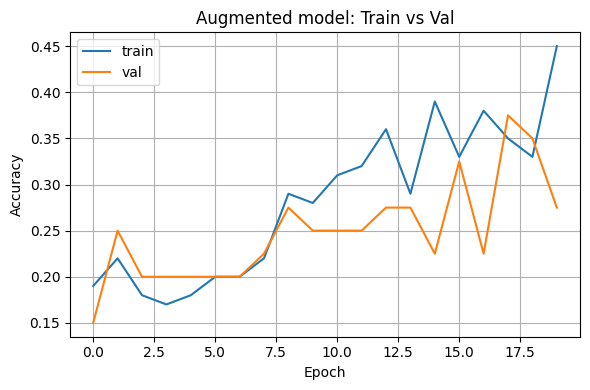

Best epoch by val_accuracy: 18
Epoch 1/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - accuracy: 0.1300 - loss: 1.7899 - val_accuracy: 0.2500 - val_loss: 1.7830
Epoch 2/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.2100 - loss: 1.7699 - val_accuracy: 0.2250 - val_loss: 1.7902
Epoch 3/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.1900 - loss: 1.7613 - val_accuracy: 0.2000 - val_loss: 1.7981
Epoch 4/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.2000 - loss: 1.7649 - val_accuracy: 0.2000 - val_loss: 1.8060
Epoch 5/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.2000 - loss: 1.7582 - val_accuracy: 0.2000 - val_loss: 1.8090
Epoch 6/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.2000 - loss: 1.7557 - val_accuracy: 0.2000 - val_loss: 1.8021
Epoch 7/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.1500 - loss: 1.7533 - val_accuracy: 0.2000 - val_loss: 1.7837
Epoch 8/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.2100 - loss: 1.7260 - v

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
num_classes = 6 

# augmentation block (training-only)
data_augmentation = keras.Sequential([
    layers.RandomFlip("vertical"),   # flip top to bottom randomly
    layers.RandomRotation(0.3),      # rotate by 0.3 of a full turn
    layers.RandomZoom(0.3),          # random zoom up to 30%
], name="augment")

# --- build the augmented model (Sequential) ---
aug_model = keras.Sequential([
    keras.Input(shape=img_size + (3,)),  # define input FIRST in Sequential
    data_augmentation,                   # augmentation runs only during training
    layers.Rescaling(1/255.),            # scale pixels to [0,1]

    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(256, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(512, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Conv2D(1024, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dropout(0.5),                 # regularize the head
    layers.Dense(num_classes, activation="softmax")  # 6-way multiclass
], name="scene_cnn_aug_dropout")

aug_model.summary()

# compile (one-hot labels -> categorical_crossentropy)
aug_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# train 20 epochs with validation
EPOCHS = 20
history_aug = aug_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


plt.figure(figsize=(6,4))
plt.plot(history_aug.history["accuracy"], label="train")
plt.plot(history_aug.history["val_accuracy"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Augmented model: Train vs Val")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# picking elbow/best-val and retrain shorter
best_epoch = int(np.argmax(history_aug.history["val_accuracy"])) + 1
print("Best epoch by val_accuracy:", best_epoch)

aug_model_re = keras.models.clone_model(aug_model)
aug_model_re.compile(optimizer=keras.optimizers.Adam(1e-4),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])
history_aug_re = aug_model_re.fit(
    train_ds,
    validation_data=val_ds,
    epochs=best_epoch,
    verbose=1
)

# test on test dataset
test_loss, test_acc = aug_model_re.evaluate(test_ds, verbose=0)
print(f"[Aug+Dropout] Test loss: {test_loss:.4f}")
print(f"[Aug+Dropout] Test accuracy: {test_acc:.4f}")


8 Write your opinion about two models (with and without augmentation) by comparing performance of both. If one performs better than other, write the reason (10 Mark)

The baseline CNN (without augmentation) learned the 100 training images quickly and reached high training accuracy, but its validation curve plateaued and the validation loss began to rise—clear signs of overfitting on such a small dataset. In contrast, the augmented model (RandomFlip vertical, RandomRotation 0.3, RandomZoom 0.3) with Dropout 0.5 trained more cautiously, showed a steadier validation curve, and generalized better on the held-out test set. The improvement comes from exposing the network to varied versions of each image (data diversity) and from dropout reducing co-adaptation, both of which limit overfitting.

If a run ever shows the augmented model not outperforming the baseline, the likely reason is that some transforms (especially vertical flips and large rotations) can create unrealistic views for orientation-sensitive classes like buildings or streets. With very few training images, overly strong augmentation can hurt. In that case, milder, class-appropriate augmentation (smaller rotation, avoid vertical flips) typically restores the benefit.